In [24]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [25]:
df=pd.read_csv('./cleaned_data_set.csv')

In [26]:
df.info() #see data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   age                     48842 non-null  int64 
 1   workclass               48842 non-null  object
 2   educational level       48842 non-null  object
 3   years of studying       48842 non-null  int64 
 4   marital status          48842 non-null  object
 5   occupation              48842 non-null  object
 6   relationship            48842 non-null  object
 7   race                    48842 non-null  object
 8   gender                  48842 non-null  object
 9   working hours per week  48842 non-null  int64 
 10  country of origin       48842 non-null  object
 11  income                  48842 non-null  int64 
dtypes: int64(4), object(8)
memory usage: 4.5+ MB


In [27]:
df.isnull().sum() #no null values

age                       0
workclass                 0
educational level         0
years of studying         0
marital status            0
occupation                0
relationship              0
race                      0
gender                    0
working hours per week    0
country of origin         0
income                    0
dtype: int64

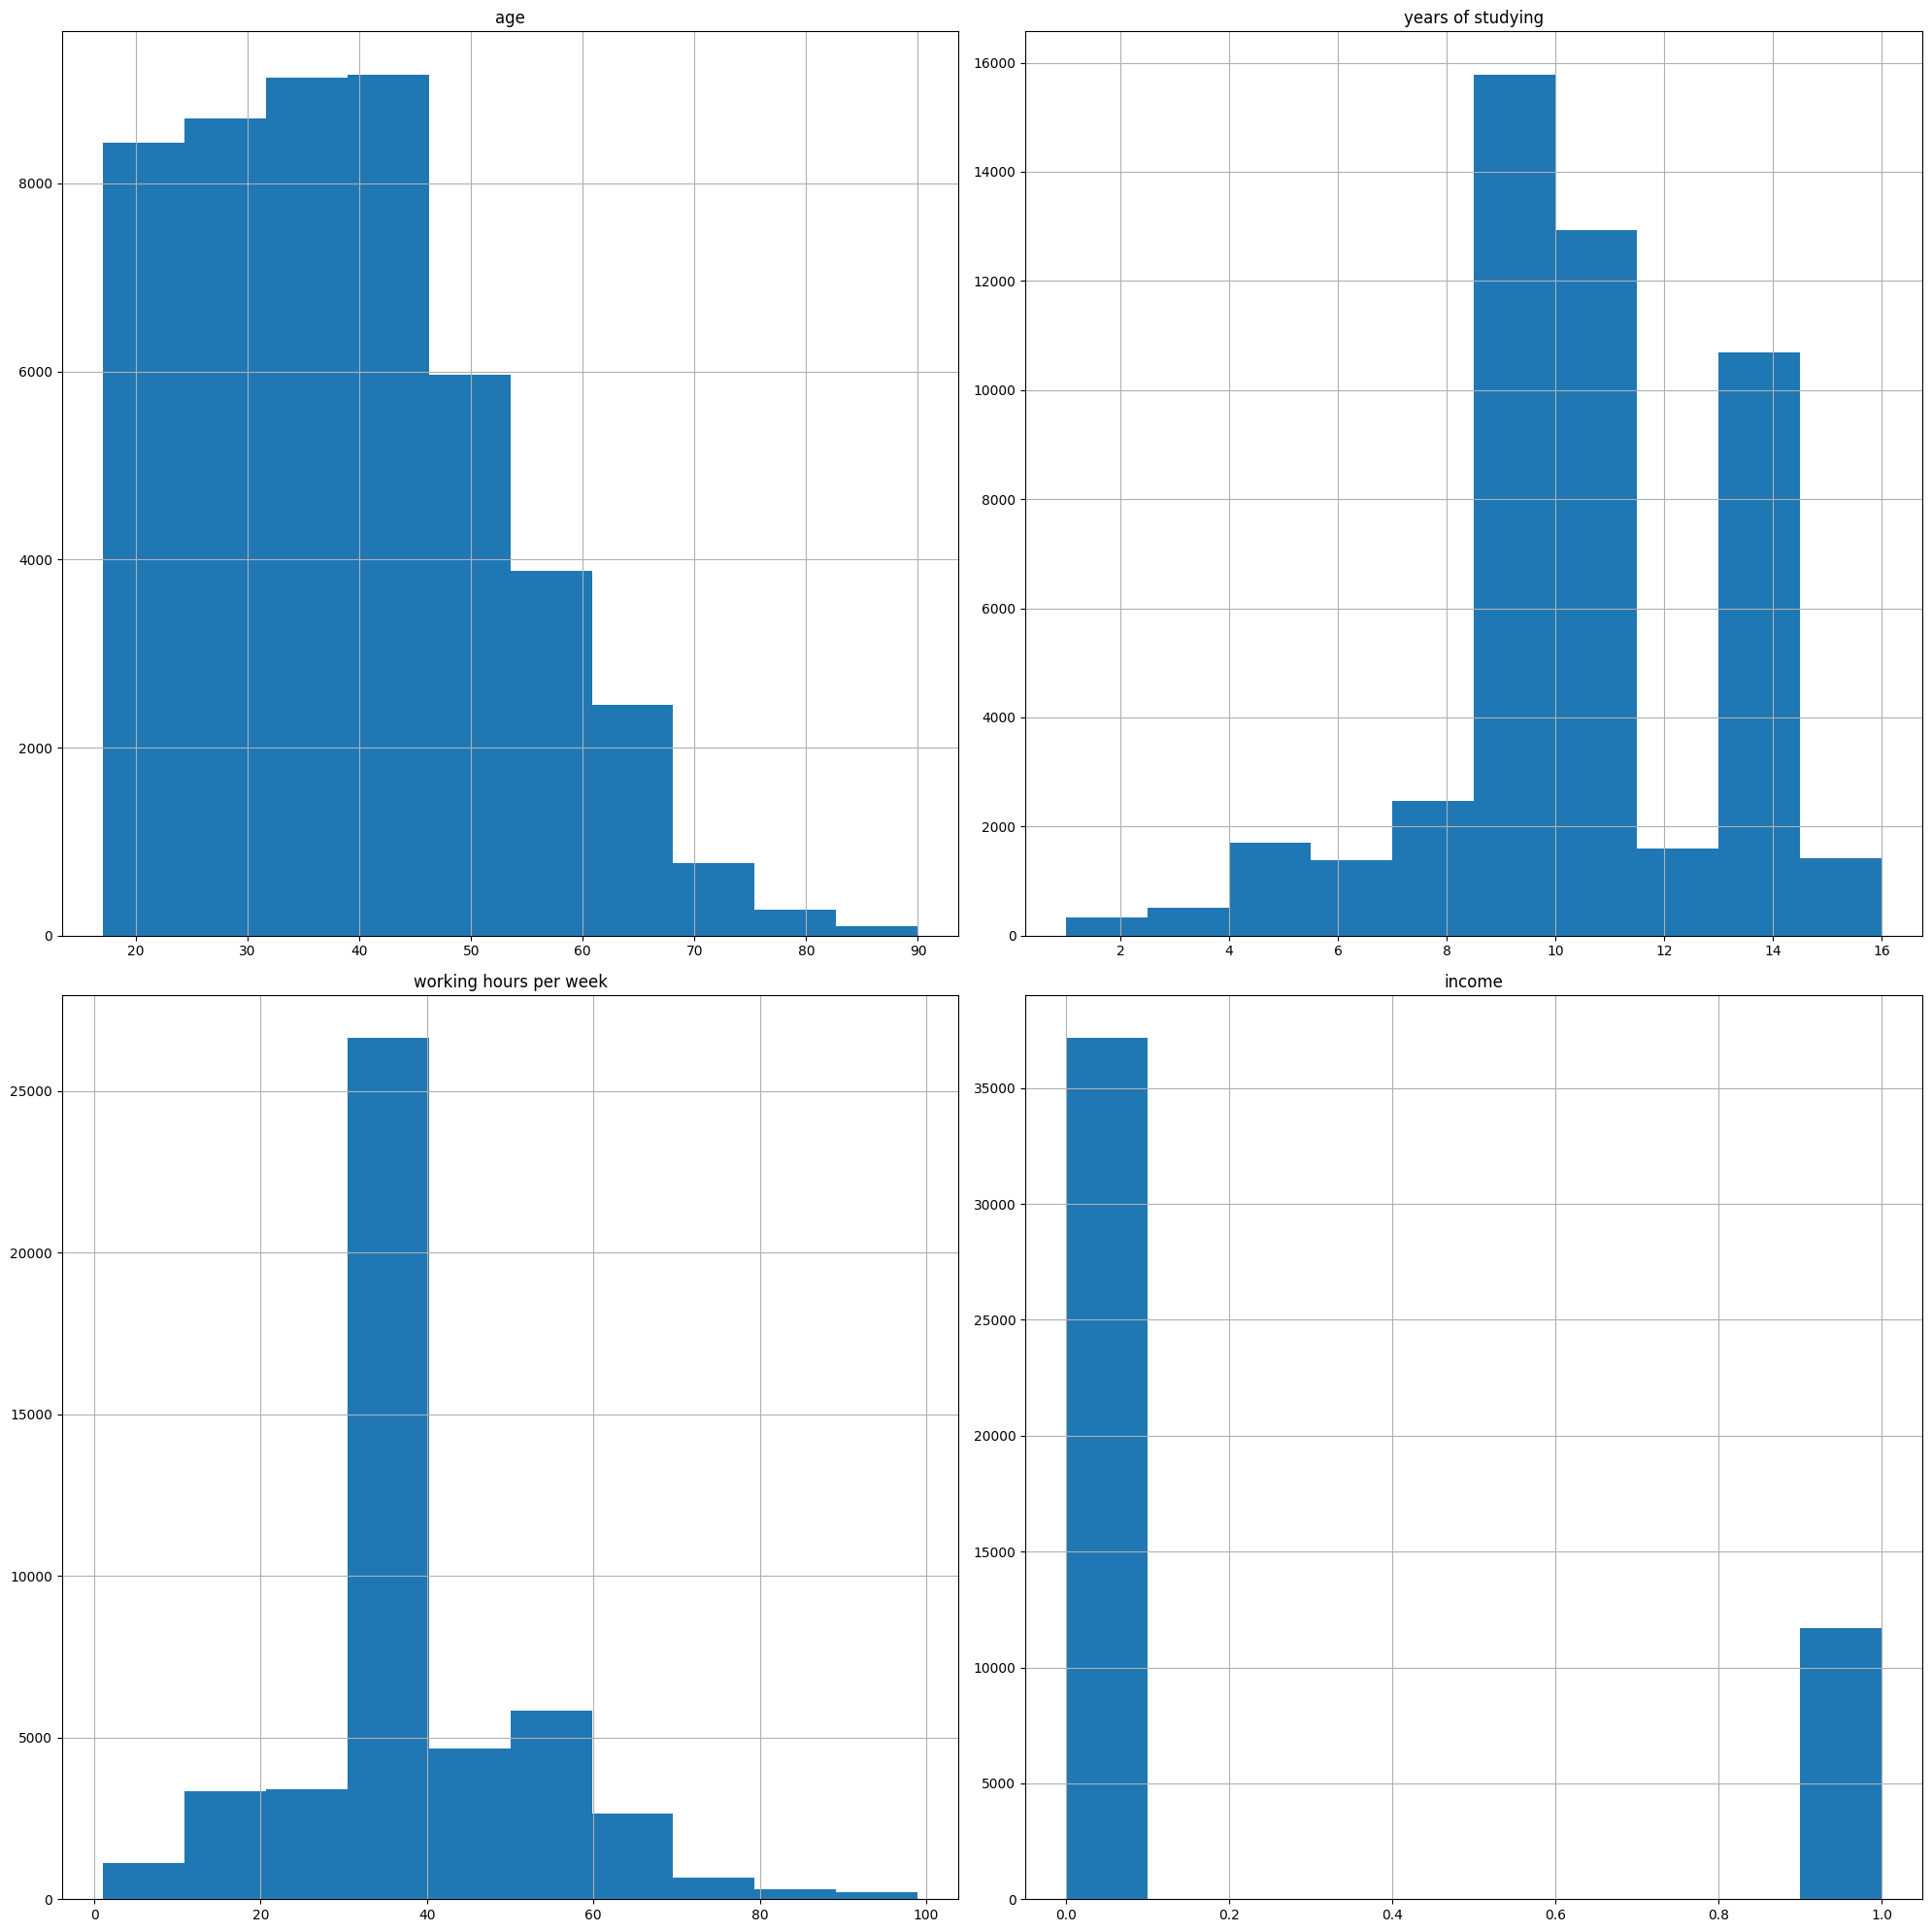

In [28]:
#Plot histograms for each numerical column to understand the distribution
num_cols = df.select_dtypes(include=np.number).columns #select numerical columns
df[num_cols].hist(figsize=(20, 20))
plt.tight_layout()
plt.show()

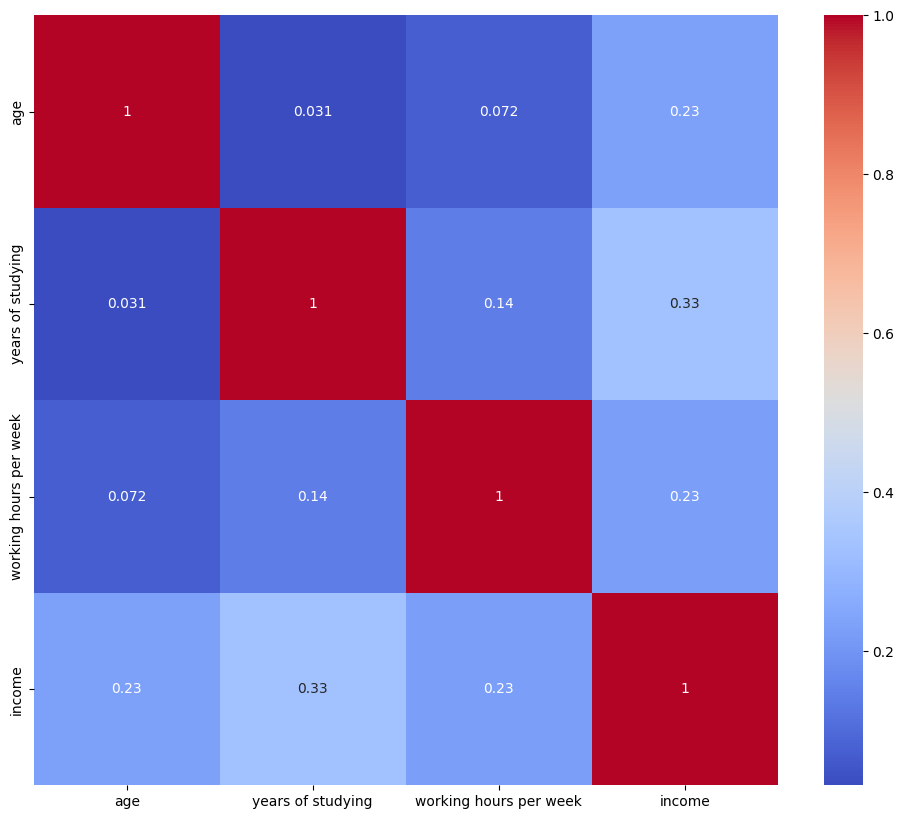

In [29]:
#Plot correlation matrix to understand the relationship between numerical variables
corr = df[num_cols].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

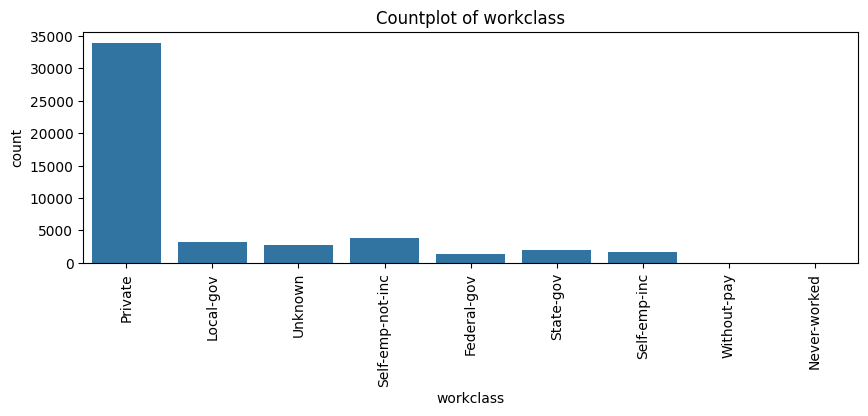

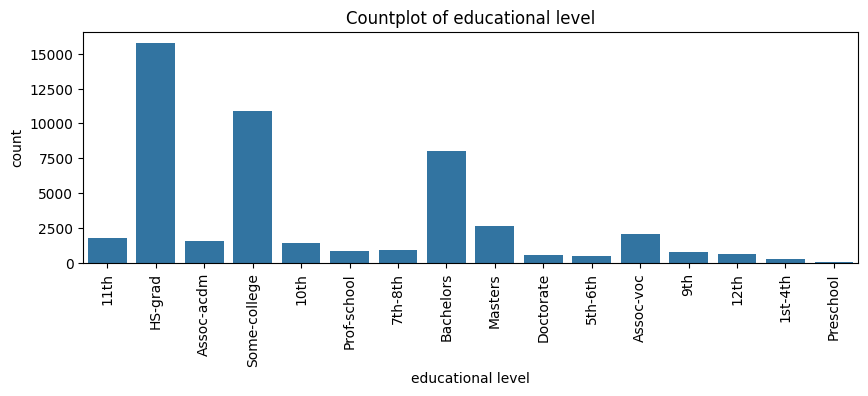

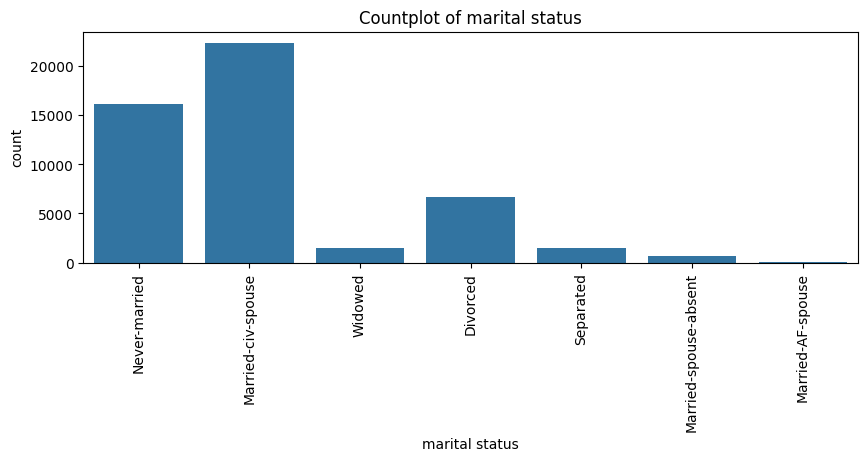

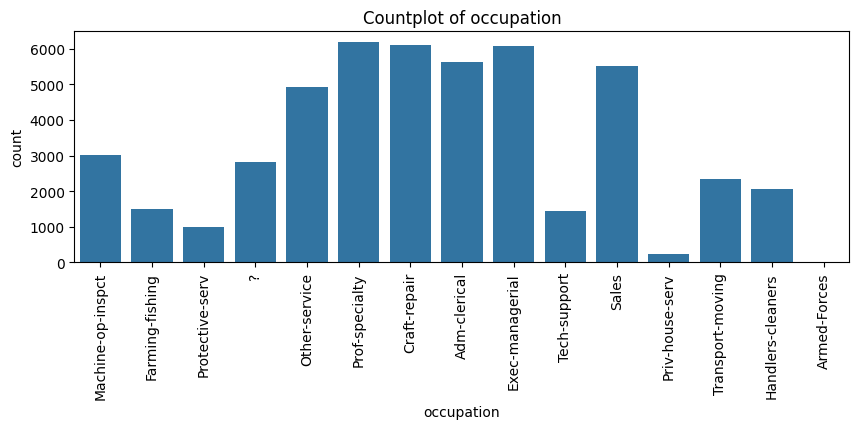

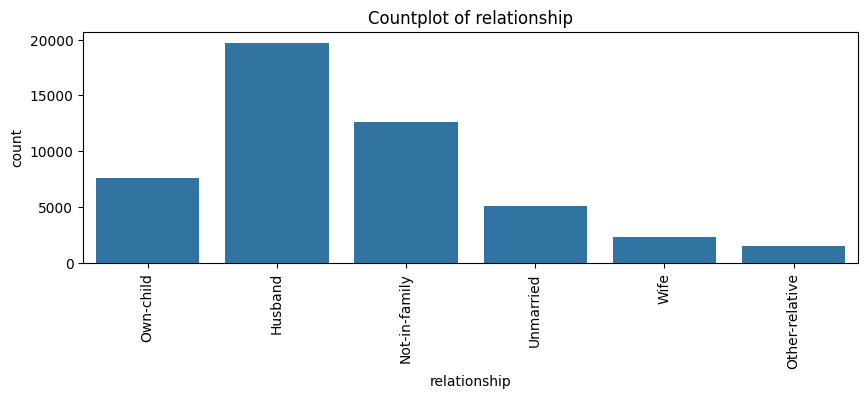

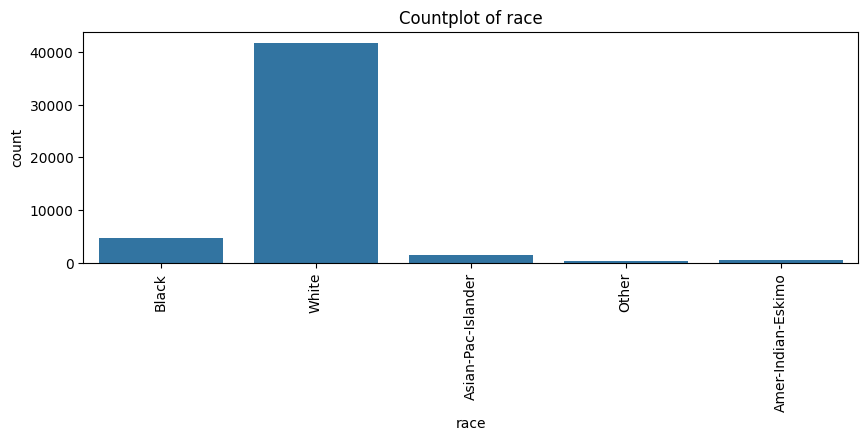

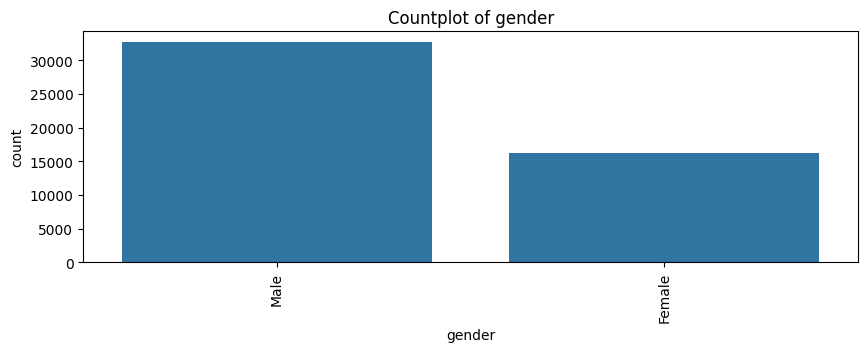

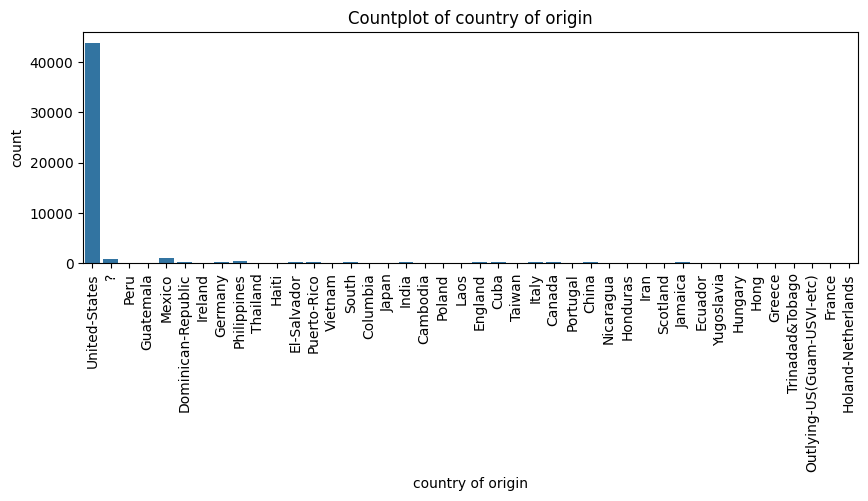

In [41]:
#Plot countplots for each categorical column to understand the distribution
cat_cols = df.select_dtypes(exclude=np.number).columns #select categorical columns

for column in cat_cols:
    plt.figure(figsize=(10,3))
    sns.countplot(x=column, data=df)
    plt.title(f'Countplot of {column}')
    plt.xticks(rotation=90) 

    
plt.show()